质量好坏预测
1、基于data class raw.csv数据，根据高斯分布概率密度函数，寻找异常点并剔除
2、基于data class processed.csv数据进行PCA处理，确定重要数据维度及成分
3、完成数据分离，数据分离参数:random state=4 test size=0.4
4、建立KNN模型完成分类，n neighbors取10，计算分类准确率，可视化分类边界
5、计算测试数据集对应的混淆矩阵算准确率、召回率、特异度、精确率F1分数
6、尝试不同的n neighbors(1-20),计算6其在训练数据集、测试数据集上的准确率并作图

In [1]:
#load data
import pandas as pd 
import numpy as np 

data = pd.read_csv('train.csv')
data.head()

,x1,x2,y
0,3.745401,0.314292,0
1,9.507143,6.364104,1
2,7.319939,3.143560,1
3,5.986585,5.085707,1
4,1.560186,9.075665,1


In [2]:
#define x and y
x = data.drop(['y'], axis=1)
y = data.loc[:, 'y']
print(y)

0     0
1     1
2     1
3     1
4     1
     ..
95    0
96    1
97    1
98    0
99    0
Name: y, Length: 100, dtype: int64


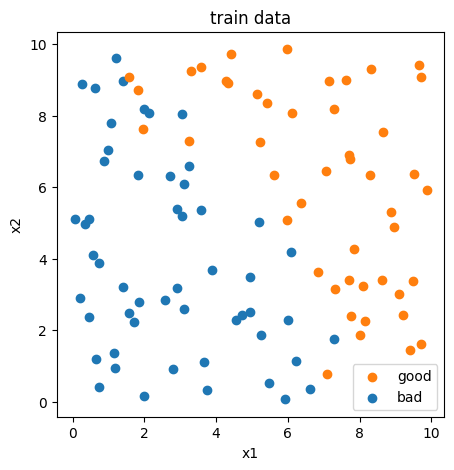

In [3]:
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
bad = plt.scatter(x.loc[:, 'x1'][y==0], x.loc[:, 'x2'][y==0])
good = plt.scatter(x.loc[:, 'x1'][y==1], x.loc[:, 'x2'][y==1])
plt.legend((good, bad), ('good', 'bad'))
plt.title('train data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
#
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(x[y==0])
y_predict_bad = ad_model.predict(x[y==0])
print(y_predict_bad)

#在选择x[y==1]异常检测，去掉相应的点
ad_model.fit(x[y==1])
y_predict_good = ad_model.predict(x[y==1])
print(y_predict_good)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1]
[ 1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


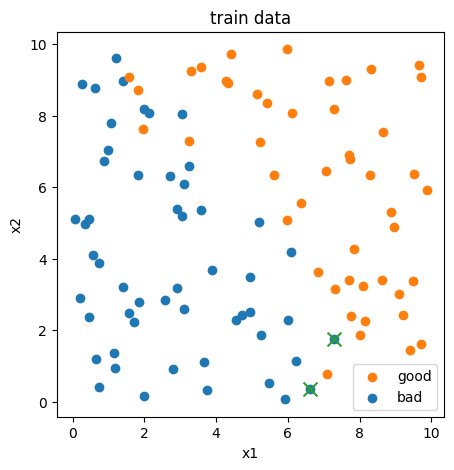

In [5]:
fig2 = plt.figure(figsize=(5,5))
bad = plt.scatter(x.loc[:, 'x1'][y==0], x.loc[:, 'x2'][y==0])
good = plt.scatter(x.loc[:, 'x1'][y==1], x.loc[:, 'x2'][y==1])
plt.scatter(x.loc[:, 'x1'][y==0][y_predict_bad==-1], x.loc[:, 'x2'][y==0][y_predict_bad==-1], marker='x',s=100)
plt.legend((good, bad), ('good', 'bad'))
plt.title('train data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

校验数据，并删除

In [6]:
#PCA 降维处理
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#第一步x 标准化处理
x_norm = StandardScaler().fit_transform(x)
#创建PCA，二维
pca = PCA(n_components=2)

#降维处理
x_reduced = pca.fit_transform(x_norm)
#主成分分析之后的数据x_reduced
#降维后，维度仍为2
var_ratio = pca.explained_variance_ratio_
#打印标准差比例
print(var_ratio)

[0.51701625 0.48298375]


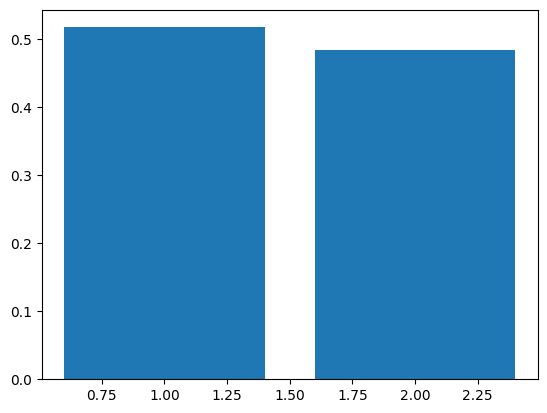

In [7]:
fig4 = plt.figure()
plt.bar([1,2], var_ratio)
plt.show()

In [8]:
#数据分离
from numpy import test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=4, test_size=0.4)
print(x_train.shape,x_test.shape,x.shape)

(60, 2) (40, 2) (100, 2)


In [9]:
#KNN model
from re import A
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(x_train, y_train)

y_train_predict = knn_10.predict(x_train)
y_test_predict = knn_10.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
Accuracy_test = accuracy_score(y_test, y_test_predict)

print('Accuracy of training data: %.2f' % accuracy_train)
print('Accuracy of test data: %.2f' % Accuracy_test)


Accuracy of training data: 0.90
Accuracy of test data: 0.90


In [14]:
#可视化
xx, yy = np.meshgrid(np.arange(0, 10, 0.05), np.arange(0, 10, 0.05))
print(xx.shape)
print(xx)
print(yy.shape)
x_range = np.c_[xx.ravel(), yy.ravel()]
print(x_range.shape)
print(x_range)

(200, 200)
[[0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 ...
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]
 [0.   0.05 0.1  ... 9.85 9.9  9.95]]
(200, 200)
(40000, 2)
[[0.   0.  ]
 [0.05 0.  ]
 [0.1  0.  ]
 ...
 [9.85 9.95]
 [9.9  9.95]
 [9.95 9.95]]


/usr/local/lib64/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


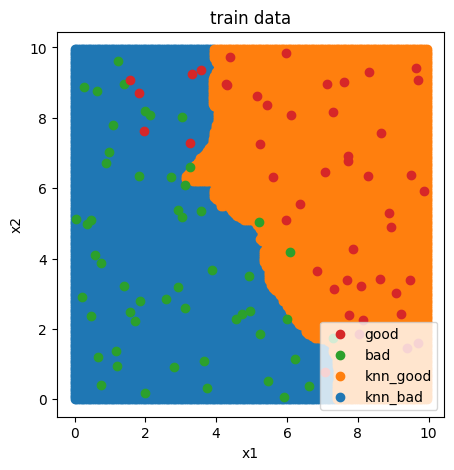

In [16]:
y_range_predict = knn_10.predict(x_range)
fig5 = plt.figure(figsize=(5,5))
knn_bad = plt.scatter(x_range[:, 0][y_range_predict==0], x_range[:, 1][y_range_predict==0])
knn_good = plt.scatter(x_range[:, 0][y_range_predict==1], x_range[:, 1][y_range_predict==1])

bad = plt.scatter(x.loc[:, 'x1'][y==0], x.loc[:, 'x2'][y==0])
good = plt.scatter(x.loc[:, 'x1'][y==1], x.loc[:, 'x2'][y==1])
plt.legend((good, bad, knn_good, knn_bad), ('good', 'bad', 'knn_good', 'knn_bad'))
plt.title('train data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [17]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
print(cm)

[[18  2]
 [ 2 18]]


In [18]:

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]


In [19]:
n = [i for i in range(1, 21)]
accuracy_train = []
accuracy_test = []

for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_train_predict = knn.predict(x_train)
    y_test_predict = knn.predict(x_test)
    accuracy_train.append(accuracy_score(y_train, y_train_predict))
    accuracy_test.append(accuracy_score(y_test, y_test_predict))

print(accuracy_train, accuracy_test)



[1.0, 0.9333333333333333, 0.95, 0.95, 0.95, 0.9333333333333333, 0.95, 0.9, 0.9, 0.9, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333] [0.85, 0.875, 0.85, 0.9, 0.875, 0.9, 0.875, 0.9, 0.875, 0.9, 0.875, 0.9, 0.875, 0.9, 0.925, 0.925, 0.95, 0.95, 0.925, 0.95]


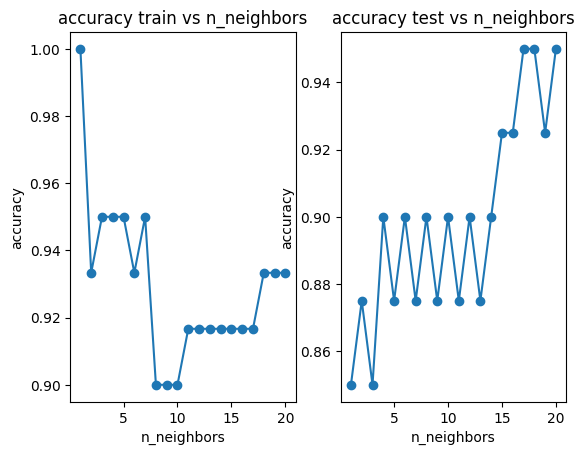

In [21]:

fig6 = plt.figure()
plt.subplot(121)
plt.plot(n, accuracy_train, marker='o')
plt.title('accuracy train vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')

plt.subplot(122)
plt.plot(n, accuracy_test, marker='o')
plt.title('accuracy test vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()